# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
from tqdm import tqdm
import glob

In [2]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  8194k      0  0:00:11  0:00:11 --:--:-- 7810k
total 1716
-rw-rw-r-- 1 thechwal thechwal 1691613 Jun 30 17:16 image_denoising.ipynb
drwx------ 2 thechwal thechwal   61440 Jun 30 15:10 paintings
-rw-rw-r-- 1 thechwal thechwal       0 Jun 29 09:15 README.md
drwxrwxr-x 2 thechwal thechwal    4096 Jun 30 17:15 tests


In [3]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Rembrandt_239.jpg',
 './paintings/Pierre-Auguste_Renoir_30.jpg',
 './paintings/Giotto_di_Bondone_56.jpg',
 './paintings/Albrecht_DuÌ\x88rer_136.jpg',
 './paintings/Marc_Chagall_189.jpg',
 './paintings/Vincent_van_Gogh_435.jpg',
 './paintings/Paul_Klee_116.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Pieter_Bruegel_80.jpg',
 './paintings/Camille_Pissarro_57.jpg',
 './paintings/Henri_de_Toulouse-Lautrec_53.jpg',
 './paintings/Marc_Chagall_231.jpg',
 './paintings/Edouard_Manet_24.jpg',
 './paintings/Claude_Monet_11.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Piet_Mondrian_12.jpg',
 './paintings/Edgar_Degas_192.jpg',
 './paintings/Alfred_Sisley_259.jpg',
 './paintings/Henri_Rousseau_21.jpg',
 './paintings/Paul_Klee_83.jpg',
 './paintings/Francisco_Goya_205.jpg',
 './paintings/Vincent_van_Gogh_299.jpg',
 './paintings/Kazimir_Malevich_79.jpg',
 './paintings/Frida_Kahlo_36.jpg',
 './paintings/Henri_Matisse_97.jpg',
 './paintings/Vincent_van_Gogh_

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [4]:
dataset_paths[53]

'./paintings/Edvard_Munch_66.jpg'

In [5]:
len(dataset_paths)

1085

In [6]:
import PIL.Image

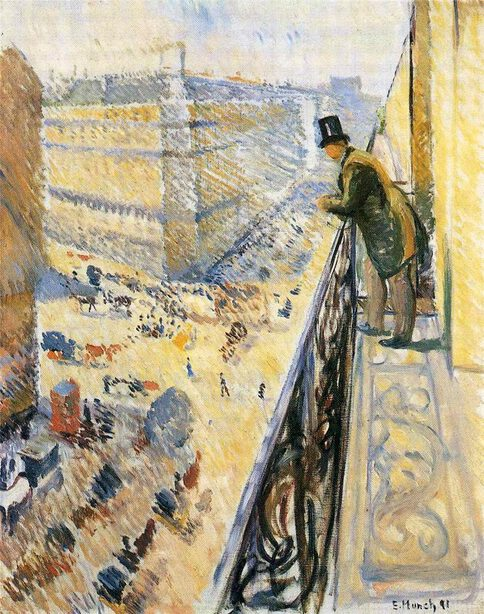

In [7]:
PIL.Image.open(dataset_paths[53])

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [8]:
import matplotlib.pyplot as plt
img = plt.imread(dataset_paths[53])

In [9]:
img_shape = img.shape

In [10]:
img_dim = img_shape[2]

❓ **What was in the image above?**

In [11]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

#is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

In [12]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [13]:
dataset_images = []
for i in range(len(dataset_paths)):
    dataset_images.append(plt.imread(dataset_paths[i]))

In [14]:
len(dataset_images)

1085

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [15]:
import numpy as np

In [16]:
dimensions = []
for image in dataset_images:
    dimensions.append(len(image.shape))

In [17]:
np.unique(dimensions)

array([2, 3])

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [18]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1967.12it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [19]:
from tensorflow.image import resize
dataset_resized = []
for image in dataset_images:
    dataset_resized.append(resize(image,[120,100]))

In [20]:
dataset_resized = np.array(dataset_resized)

In [21]:
dataset_resized.shape

(1085, 120, 100, 3)

In [22]:
type(dataset_resized)

numpy.ndarray

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [23]:
dataset_scaled = dataset_resized/255

In [24]:
np.unique(dataset_scaled)

array([0.0000000e+00, 9.3474650e-10, 1.3714181e-09, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

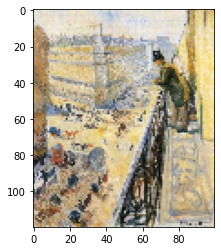

In [25]:
plt.imshow(dataset_scaled[53])

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [26]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

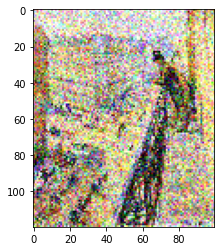

In [27]:
plt.imshow(dataset_noisy[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [29]:
X_train.shape

(868, 120, 100, 3)

In [30]:
Y_train.shape

(868, 120, 100, 3)

In [31]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [33]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [34]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

encoder = Sequential(name="encoder")
    
encoder.add(Conv2D(8, (2,2), input_shape=(120, 100, 3), activation='relu', padding="same"))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(16, (2, 2), activation='relu', padding="same"))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(32, (2, 2), activation='relu', padding="same"))
encoder.add(MaxPooling2D(2))     

encoder.add(Flatten())
encoder.add(Dense(6000, activation='tanh'))

In [35]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 100, 8)       104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 50, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 25, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0   

👉 **Test your encoder below**

In [36]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              34568712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 34,575,387
Trainable params: 34,575,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [37]:
from tensorflow.keras.metrics import mean_absolute_error
    
score_baseline = np.mean(mean_absolute_error(Y_train, X_train))

In [38]:
score_baseline

0.14104423

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [40]:
autoencoder.compile(loss="mae",
                    metrics="mae",
                   optimizer="adam")


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

es= EarlyStopping(patience=5)

In [42]:
history = autoencoder.fit(X_train, Y_train, epochs=40, batch_size=32, callbacks=[es], validation_split=0.3)

Epoch 1/40
19/19 [==============================] - 10s 481ms/step - loss: 0.2396 - mae: 0.2396 - val_loss: 0.2387 - val_mae: 0.2387
Epoch 2/40
19/19 [==============================] - 8s 448ms/step - loss: 0.2279 - mae: 0.2279 - val_loss: 0.2310 - val_mae: 0.2310
Epoch 3/40
19/19 [==============================] - 9s 479ms/step - loss: 0.2096 - mae: 0.2096 - val_loss: 0.2059 - val_mae: 0.2059
Epoch 4/40
19/19 [==============================] - 9s 462ms/step - loss: 0.1855 - mae: 0.1855 - val_loss: 0.1852 - val_mae: 0.1852
Epoch 5/40
19/19 [==============================] - 9s 466ms/step - loss: 0.1717 - mae: 0.1717 - val_loss: 0.1767 - val_mae: 0.1767
Epoch 6/40
19/19 [==============================] - 8s 443ms/step - loss: 0.1618 - mae: 0.1618 - val_loss: 0.1646 - val_mae: 0.1646
Epoch 7/40
19/19 [==============================] - 9s 467ms/step - loss: 0.1452 - mae: 0.1452 - val_loss: 0.1475 - val_mae: 0.1475
Epoch 8/40
19/19 [==============================] - 9s 455ms/step - loss: 0

❓ **Plot your training and validation loss at each epoch using the cell below**

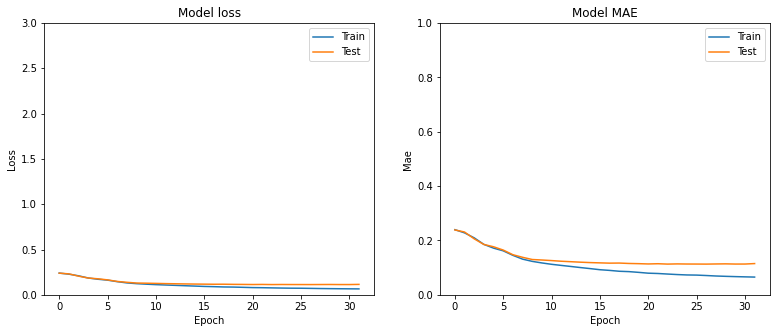

In [43]:
# Plot below your train/val loss history
def plot_loss_mae(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('Model MAE')
    ax[1].set_ylabel('Mae')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

plot_loss_mae(history)


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [44]:
Y_pred = autoencoder.predict(X_test)

In [49]:
score_test = autoencoder.evaluate(X_test,Y_test)[1]

7/7 [==============================] - 1s 120ms/step - loss: 0.1118 - mae: 0.1118


In [50]:
score_test

0.11181534081697464

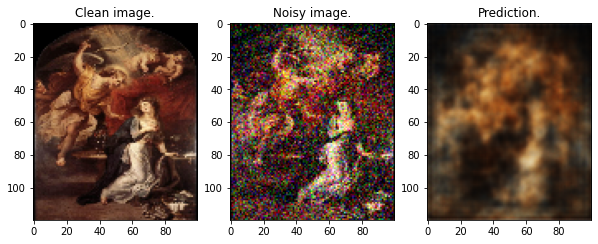

In [46]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [51]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()